In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import collections
from tqdm import tqdm

# build matrix

In [2]:
deps = 'ab bc bd be bf cf df bg fh gh ci dj ek el km lm in jo no fp hq pq kr lr os qs rs mt st tu uv aw vx wx'
deps = [(x[0], x[1]) for x in deps.split(' ')]
deps

[('a', 'b'),
 ('b', 'c'),
 ('b', 'd'),
 ('b', 'e'),
 ('b', 'f'),
 ('c', 'f'),
 ('d', 'f'),
 ('b', 'g'),
 ('f', 'h'),
 ('g', 'h'),
 ('c', 'i'),
 ('d', 'j'),
 ('e', 'k'),
 ('e', 'l'),
 ('k', 'm'),
 ('l', 'm'),
 ('i', 'n'),
 ('j', 'o'),
 ('n', 'o'),
 ('f', 'p'),
 ('h', 'q'),
 ('p', 'q'),
 ('k', 'r'),
 ('l', 'r'),
 ('o', 's'),
 ('q', 's'),
 ('r', 's'),
 ('m', 't'),
 ('s', 't'),
 ('t', 'u'),
 ('u', 'v'),
 ('a', 'w'),
 ('v', 'x'),
 ('w', 'x')]

In [3]:
idx = [chr(x) for x in range(ord('a'), ord('y'))]
df = pd.DataFrame(index=idx, columns=idx)
for i, j in deps:
    df.at[j, i] = 1
df

,a,b,c,d,e,f,g,h,i,j,...,o,p,q,r,s,t,u,v,w,x
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
j,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

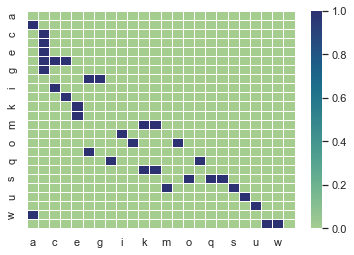

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df.fillna(0), linewidth=.5, cmap="crest")

# modify matrix

In [5]:
new_deps = 'hf, ij ji kl lk hg qh so tm'
new_deps = [(x[0], x[1]) for x in new_deps.split(' ')]
new_deps

[('h', 'f'),
 ('i', 'j'),
 ('j', 'i'),
 ('k', 'l'),
 ('l', 'k'),
 ('h', 'g'),
 ('q', 'h'),
 ('s', 'o'),
 ('t', 'm')]

In [6]:
for i, j in new_deps:
    df.at[j, i] = 1
df

,a,b,c,d,e,f,g,h,i,j,...,o,p,q,r,s,t,u,v,w,x
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f,NaN,1,1,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
j,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

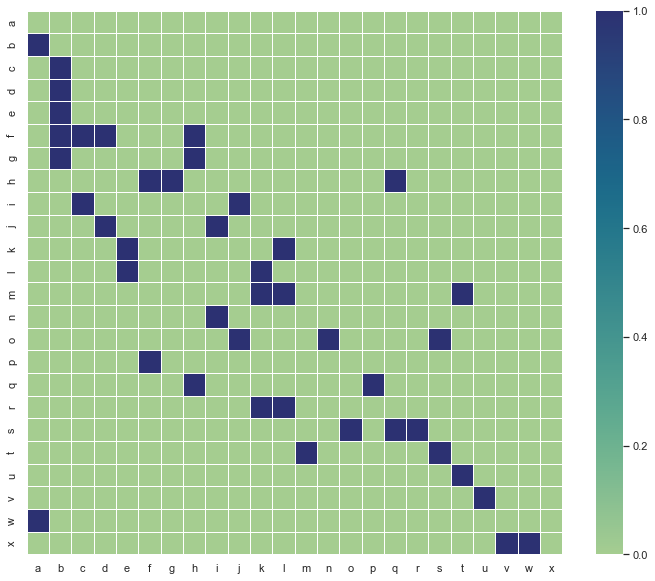

In [7]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df.fillna(0), linewidth=.5, cmap="crest")

# identify loop

In [8]:
m = df.fillna(0)
sns.set(rc={'figure.figsize':(12,10)})

<AxesSubplot:>

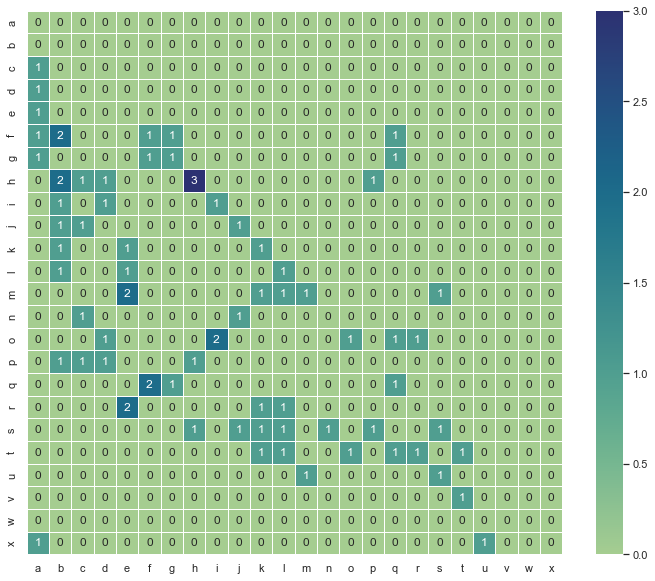

In [9]:
# 2
sns.heatmap(m.dot(m), linewidth=.5, cmap="crest", annot=True)

<AxesSubplot:>

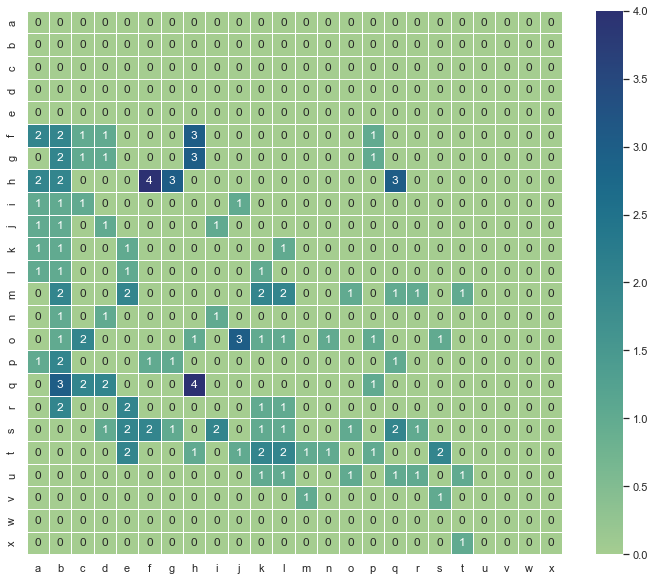

In [10]:
# 3
sns.heatmap(m.dot(m).dot(m), linewidth=.5, cmap="crest", annot=True)

<AxesSubplot:>

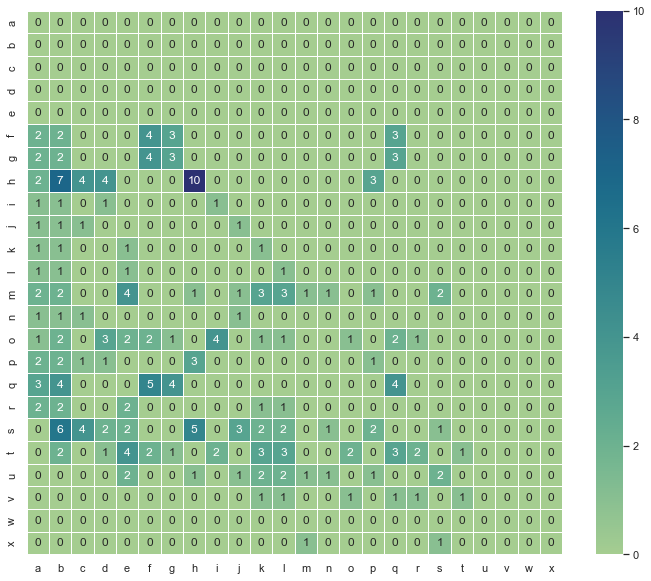

In [11]:
# 4
sns.heatmap(m.dot(m).dot(m).dot(m), linewidth=.5, cmap="crest", annot=True)

# partitioning algorithm

In [12]:
def get_new_group(seqence):
    seq = seqence.split(' ')
    temp = pd.DataFrame(index=seq, columns=seq)
    for i in seq:
        for j in seq:
            temp.at[i, j] = df.at[i, j]
    return temp.fillna(0)

def plot_sequence(sequence):
    group = get_new_group(sequence)
    ax = sns.heatmap(group, linewidth=.5, cmap="crest", annot=True)
    ax.plot(range(len(group)+1), range(len(group)+1), 'red')

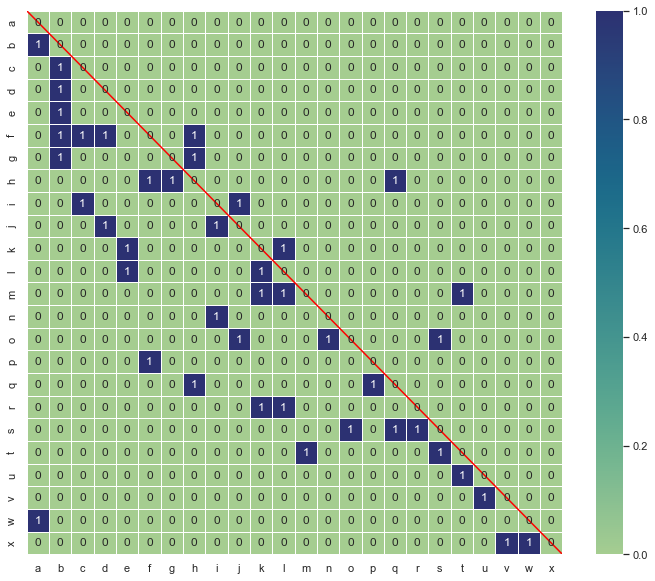

In [13]:
plot_sequence('a b c d e f g h i j k l m n o p q r s t u v w x')

find group(1): fgh, show group(1)

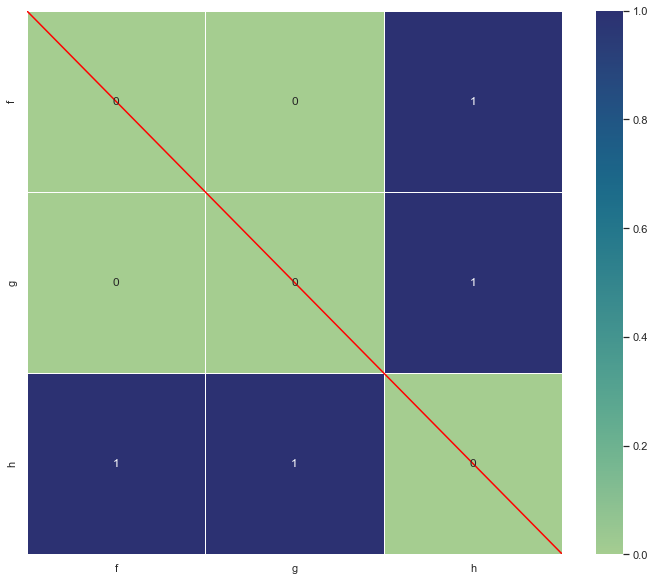

In [14]:
plot_sequence('f g h')

find group(2): h-q, show group(2)

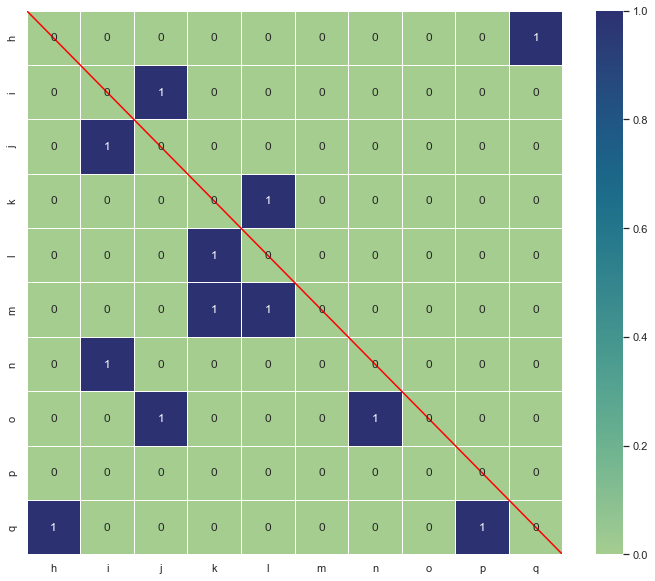

In [15]:
plot_sequence('h i j k l m n o p q')

move p to top after g, and o to bottom after q, now sequence is **'a b c d e f g p h i j k l m n q o r s t u v w x'**, find group(3) sequence is **'h i j k l m n q'**, show group(3)

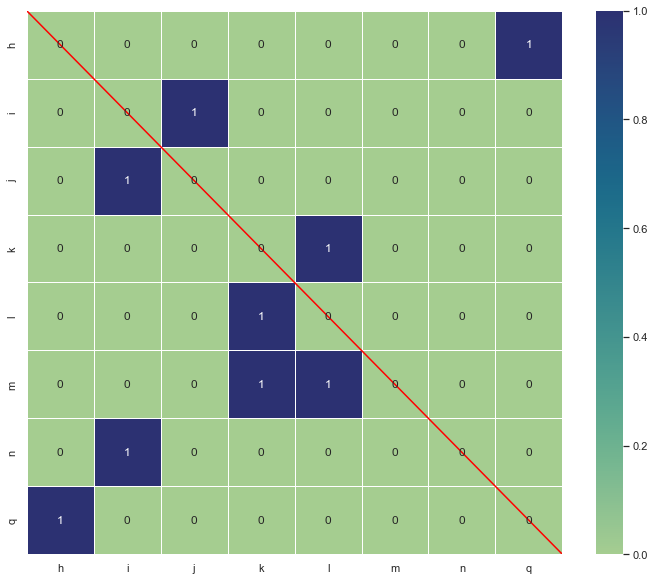

In [16]:
plot_sequence('h i j k l m n q')

move m, n to bottom after q, now sequence is **'a b c d e f g p h i j k l q m n o r s t u v w x'**, find group(4) sequence is **'h i j k l q'**, show group(4)

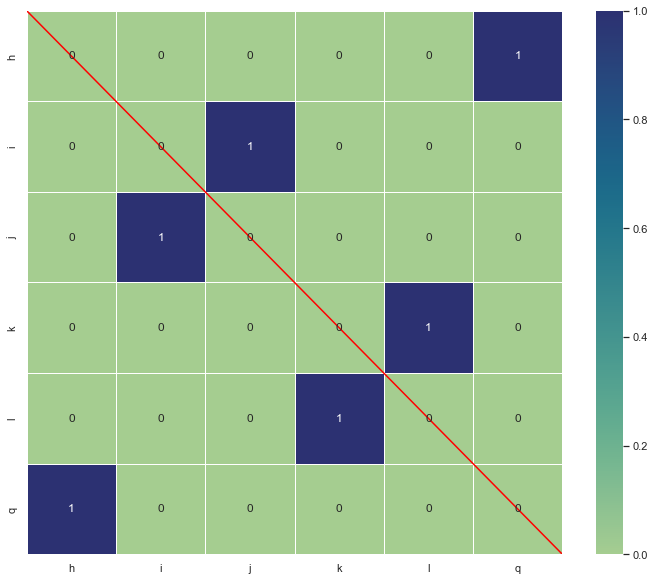

In [17]:
plot_sequence('h i j k l q')

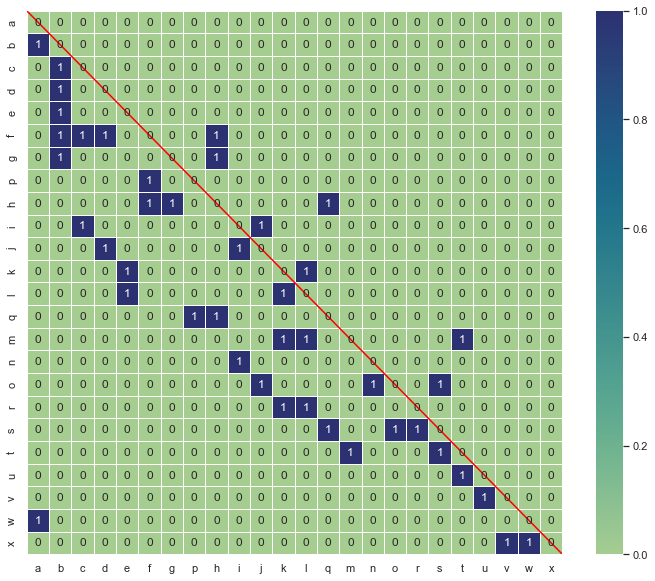

In [18]:
plot_sequence('a b c d e f g p h i j k l q m n o r s t u v w x')

find group(5): m n o r s t, show group(5)

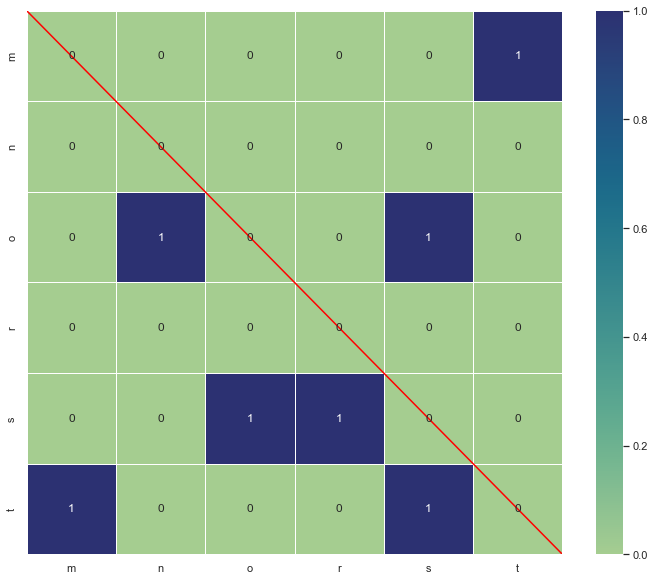

In [19]:
plot_sequence('m n o r s t')

move n, r to top before m, now sequence is **'a b c d e f g p h i j k l q n r m o s t u v w x'**, find group(6) sequence is **'m o s t'**, show group(6)

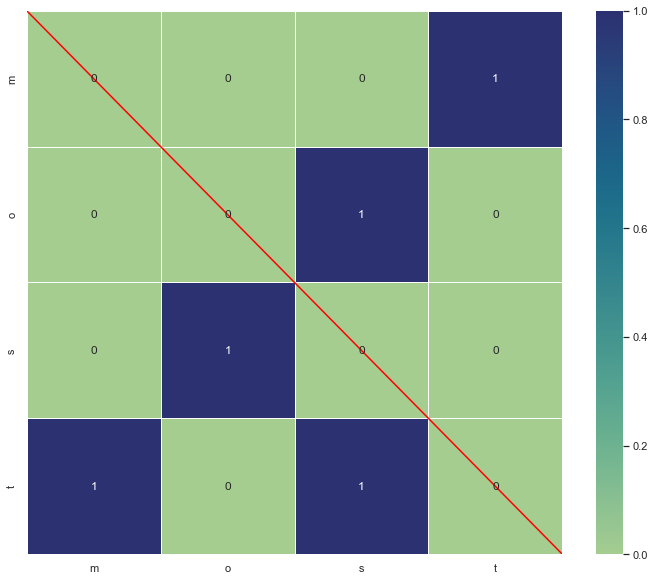

In [20]:
plot_sequence('m o s t')

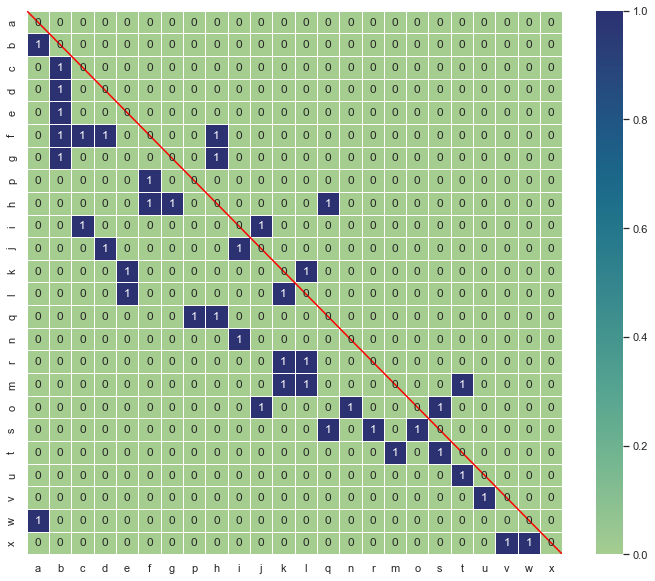

In [21]:
plot_sequence('a b c d e f g p h i j k l q n r m o s t u v w x')

# visibility matrix V

In [60]:
def get_visibility_matrix_v(matrix):
    result, temp = matrix, matrix
    while temp.sum().sum() > 0:
        temp = temp.dot(matrix)
        result = result + temp
    return result

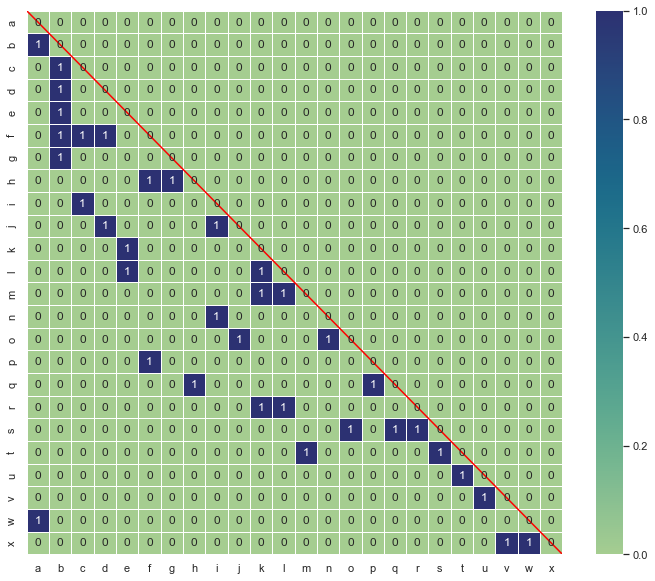

In [70]:
m = df.copy().fillna(0)
for i in df.index:
    for j in df.columns:
        if i < j:
            m.at[i, j] = 0
ax = sns.heatmap(m, linewidth=.5, cmap="crest", annot=True)
ax.plot(range(25), range(25), 'red')

<AxesSubplot:>

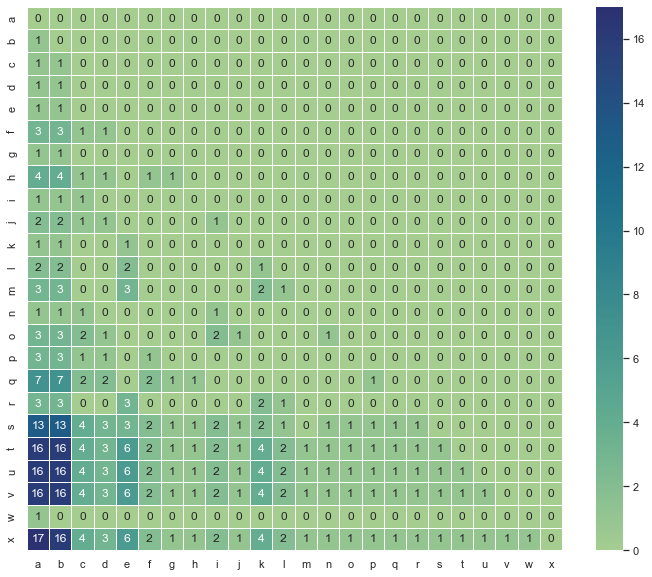

In [66]:
visibility_matrix = get_visibility_matrix_v(m)
sns.heatmap(visibility_matrix, linewidth=.5, cmap="crest", annot=True)

In [68]:
visibility_matrix.sum().sort_values(ascending=False)

a    117
b    114
e     36
c     30
k     23
d     22
f     14
i     14
l     11
g      7
p      6
n      6
j      6
h      6
o      5
q      5
r      5
s      4
m      4
t      3
u      2
v      1
w      1
x      0
dtype: int64

# Estimate

In [24]:
def get_e(p, n=10000):
    return sum([x*(p**(x-1))*(1-p) for x in range(1, n+1)])

In [25]:
get_e(0.666), get_e(0.667)

(2.9940119760479025, 3.0030030030030033)

In [26]:
get_e(0.666, 100000), get_e(0.667, 100000)

(2.9940119760479025, 3.0030030030030033)

Assume the probability of every rework event is 0.667 (and then the expection of iteration loop is nearly 3 times). We alse assume that every time a task has to be repeated it will only take half the time it took the previous time that task was executed.

In [27]:
cost = "a:0 b:10 c:5 d:5 e:8 f:15 g:12 h:25 i:40 j:15 k:17 l:15 m:8 n:2 o:10 p:12 q:5 r:10 s:10 t:5 u:5 v:10 x:0"
cost = {x[0]: int(x[2:]) for x in cost.split(' ')}
cost

{'a': 0,
 'b': 10,
 'c': 5,
 'd': 5,
 'e': 8,
 'f': 15,
 'g': 12,
 'h': 25,
 'i': 40,
 'j': 15,
 'k': 17,
 'l': 15,
 'm': 8,
 'n': 2,
 'o': 10,
 'p': 12,
 'q': 5,
 'r': 10,
 's': 10,
 't': 5,
 'u': 5,
 'v': 10,
 'x': 0}

In [28]:
transfer_m = pd.DataFrame()
for i in 'abcdefghijklmnopqrstuvx':
    for j in 'abcdefghijklmnopqrstuvx':
        if i < j and df.at[i, j] > 0:
            transfer_m.at[i, j] = 0.667
        else:
            transfer_m.at[i, j] = df.at[i, j]

<AxesSubplot:>

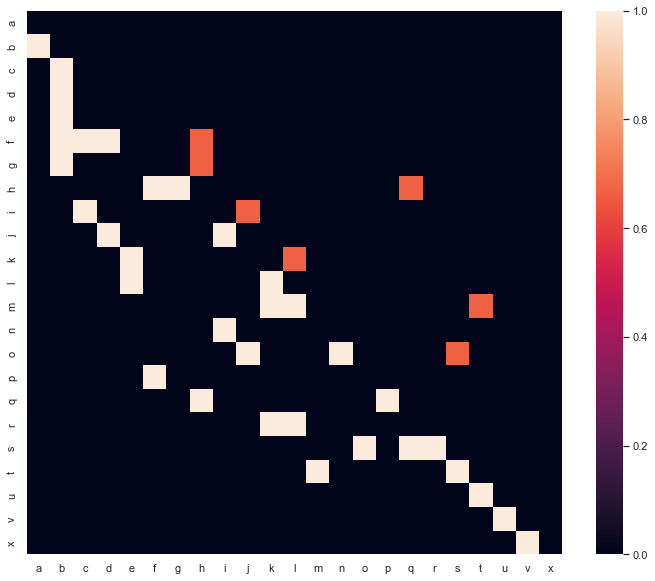

In [29]:
sns.heatmap(transfer_m.fillna(0))

In [30]:
def simulation_workflow():
    work_record, wait_cache, cost_cache = {}, {'a'}, cost.copy()
    queue = collections.deque(['a'])
    while queue:
        node = queue.popleft()
        pre_nodes = transfer_m.loc[node, :].dropna()
        dependency_nodes = pre_nodes[pre_nodes == 1].index
        if all([x in work_record for x in dependency_nodes]):
            work_record[node] = max([work_record.get(x, 0) for x in pre_nodes.index], default=0) + cost_cache[node]
            cost_cache[node] /= 2
            wait_cache.remove(node)
            for next_node, prob in transfer_m[node].dropna().items():
                if random.random() <= prob and next_node not in wait_cache:
                    queue.append(next_node)
                    wait_cache.add(next_node)
    return work_record['x']

In [31]:
result = [simulation_workflow() for _ in tqdm(range(10000))]

  0%|▏                                                                                         | 14/10000 [00:03<41:38,  4.00it/s]

KeyboardInterrupt: 

In [ ]:
sns.displot(result, kde=True)

In [ ]:
sns.displot(result, kind="ecdf")